In [1]:
#Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Get the data

df = pd.read_csv('scotch_review.csv').drop('Unnamed: 0', axis=1)
df.head()

,name,category,review.point,price,currency,description
0,"Johnnie Walker Blue Label, 40%",Blended Scotch Whisky,97,225,$,"Magnificently powerful and intense. Caramels, ..."
1,"Black Bowmore, 1964 vintage, 42 year old, 40.5%",Single Malt Scotch,97,4500.00,$,What impresses me most is how this whisky evol...
2,"Bowmore 46 year old (distilled 1964), 42.9%",Single Malt Scotch,97,13500.00,$,There have been some legendary Bowmores from t...
3,"Compass Box The General, 53.4%",Blended Malt Scotch Whisky,96,325,$,With a name inspired by a 1926 Buster Keaton m...
4,"Chivas Regal Ultis, 40%",Blended Malt Scotch Whisky,96,160,$,"Captivating, enticing, and wonderfully charmin..."


In [3]:
## Drop duplicates
df = df.drop_duplicates(keep= 'first')

## Check the shape 
df.shape


(2245, 6)

In [4]:
## Check the info 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2245 entries, 0 to 2246
Data columns (total 6 columns):
name            2245 non-null object
category        2245 non-null object
review.point    2245 non-null int64
price           2245 non-null object
currency        2245 non-null object
description     2245 non-null object
dtypes: int64(1), object(5)
memory usage: 122.8+ KB


In [5]:
df = df[df.price.apply(lambda x: x.isnumeric())]
df['price'] = pd.to_numeric(df['price'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1113 entries, 0 to 2231
Data columns (total 6 columns):
name            1113 non-null object
category        1113 non-null object
review.point    1113 non-null int64
price           1113 non-null int64
currency        1113 non-null object
description     1113 non-null object
dtypes: int64(2), object(4)
memory usage: 60.9+ KB


In [6]:
df.shape

(1113, 6)

In [7]:
## Check the stats
df.describe()

,review.point,price
count,1113.000000,1113.000000
mean,86.703504,373.813118
std,3.632903,1591.183863
min,76.000000,12.000000
25%,84.000000,70.000000
50%,87.000000,110.000000
75%,89.000000,190.000000
max,97.000000,27620.000000


In [8]:
## Function to remove outliers

def remove_outliers(data_frame, column_list, low=0.02, high=0.95):
   for column in column_list:
       this_column = data_frame[column]
       quant_df = this_column.quantile([low,high])
       low_limit = quant_df[low]
       high_limit = quant_df[high]
       data_frame[column] = data_frame[column].clip(lower=low_limit, upper=high_limit)
   return data_frame

## Remove outlier
columns_outlier = ['review.point', 'price']

df = remove_outliers(df, columns_outlier)


In [9]:
df.describe()

,review.point,price
count,1113.000000,1113.000000
mean,86.649596,211.223468
std,3.418809,264.992685
min,79.000000,23.240000
25%,84.000000,70.000000
50%,87.000000,110.000000
75%,89.000000,190.000000
max,92.000000,1092.200000


In [10]:
df.shape

(1113, 6)

In [11]:
## Find how many null values
df.isnull().sum()

name            0
category        0
review.point    0
price           0
currency        0
description     0
dtype: int64

In [12]:
## Find how many unique values
df.nunique()

name            1105
category           5
review.point      14
price            286
currency           1
description     1113
dtype: int64

In [13]:
## Find the unique values in a single column
df.category.unique()

array(['Blended Scotch Whisky', 'Blended Malt Scotch Whisky',
       'Single Malt Scotch', 'Grain Scotch Whisky', 'Single Grain Whisky'],
      dtype=object)

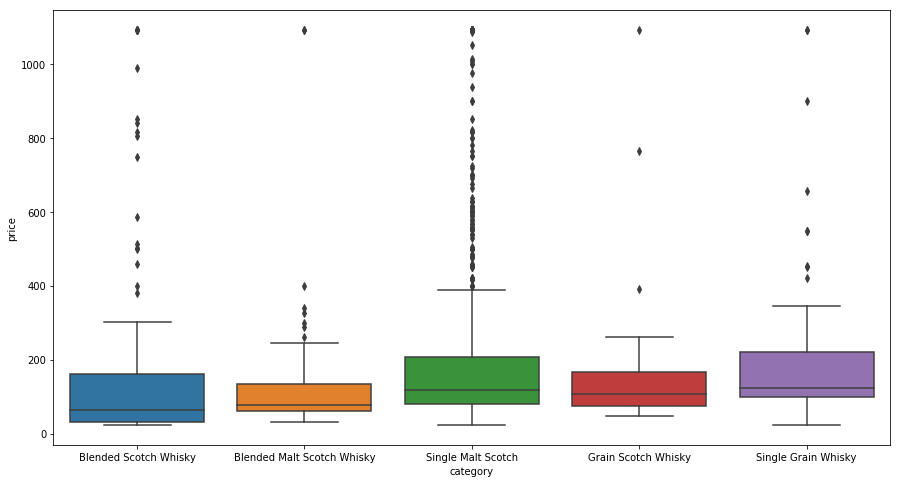

In [14]:
## Box plot

plt.figure(figsize=(15,8))
sns.boxplot(x="category", y="price", data=df)
plt.show()

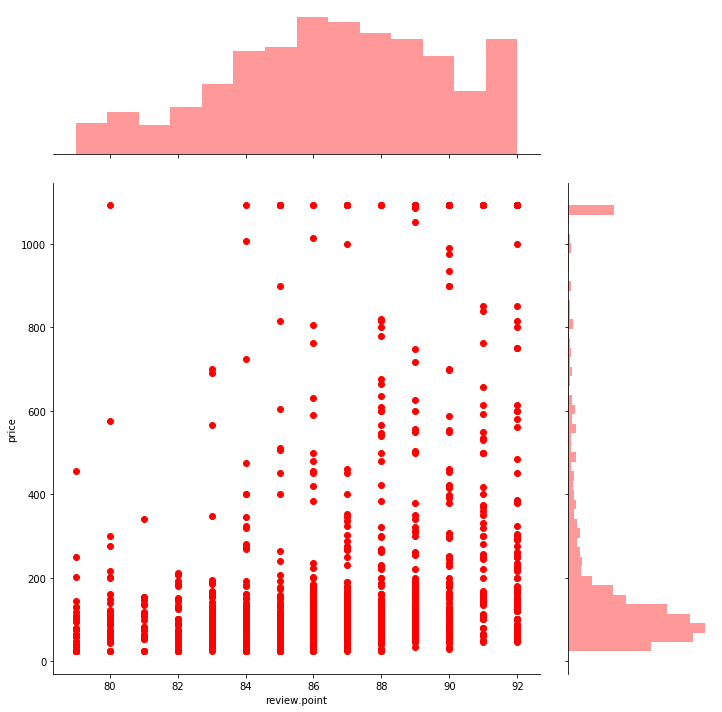

In [15]:
##Joint plot - scatter in middle and distribution on top and sides

sns.jointplot(x="review.point", y="price", data=df, height=10, ratio=3, color="r")
plt.show()

In [16]:
#Correlation between review.point and price?
df['review.point'].corr(df.price)

0.3267540120104054

In [17]:
df.quantile(.75, axis = 0)

review.point     89.0
price           190.0
Name: 0.75, dtype: float64

In [18]:
df['description'].isnull().sum()

0

In [19]:
from collections import Counter

df['description'] = df['description'].str.replace(" and ", "", regex=False)
df['description'] = df['description'].str.replace(" the ", "", regex=False)
df['description'] = df['description'].str.replace(" of ", "", regex=False)
df['description'] = df['description'].str.replace(" a ", "", regex=False)
df['description'] = df['description'].str.replace(" with ", "", regex=False)
df['description'] = df['description'].str.replace(" in ", "", regex=False)
df['description'] = df['description'].str.replace(" is ", "", regex=False)
df['description'] = df['description'].str.replace(" The ", "", regex=False)
df['description'] = df['description'].str.replace(" on ", "", regex=False)
df['description'] = df['description'].str.replace(" to ", "", regex=False)
df['description'] = df['description'].str.replace(" this ", "", regex=False)
df['description'] = df['description'].str.replace(" A ", "", regex=False)
df['description'] = df['description'].str.replace(" nose ", "", regex=False)
df['description'] = df['description'].str.replace(" palate ", "", regex=False)
df['description'] = df['description'].str.replace(" blend ", "", regex=False)
df['description'] = df['description'].str.replace(" but ", "", regex=False)
df['description'] = df['description'].str.replace("This ", "", regex=False)
df['description'] = df['description'].str.replace(" from ", "", regex=False)
df['description'] = df['description'].str.replace(" it ", "", regex=False)
df['description'] = df['description'].str.replace(" has ", "", regex=False)
df['description'] = df['description'].str.replace(" for ", "", regex=False)
df['description'] = df['description'].str.replace(" an ", "", regex=False)

df['description'] = df['description'].str.replace(" cask ", "", regex=False)
df['description'] = df['description'].str.replace(" year ", "", regex=False)
df['description'] = df['description'].str.replace(" old ", "", regex=False)
df['description'] = df['description'].str.replace(" single ", "", regex=False)

df['description'] = df['description'].str.replace("The ", "", regex=False)
df['description'] = df['description'].str.replace(" then ", "", regex=False)
df['description'] = df['description'].str.replace(" its ", "", regex=False)
df['description'] = df['description'].str.replace(" It ", "", regex=False)

df['description'] = df['description'].str.replace(" that ", "", regex=False)
df['description'] = df['description'].str.replace(" was ", "", regex=False)
df['description'] = df['description'].str.replace(" are ", "", regex=False)
df['description'] = df['description'].str.replace("A ", "", regex=False)

Counter(" ".join(df["description"]).split()).most_common(100)

[('bottles)', 175),
 ('sherry', 167),
 ('oak', 162),
 ('sweet', 159),
 ('more', 148),
 ('finish.', 137),
 ('by', 130),
 ('notes', 124),
 ('you', 115),
 ('fruit', 112),
 ('fruits,', 105),
 ('which', 99),
 ('Water', 97),
 ('orange', 95),
 ('chocolate,', 94),
 ('dried', 92),
 ('some', 86),
 ('honey,', 84),
 ('chocolate', 83),
 ('oak.', 83),
 ('vanilla,', 82),
 ('peat', 80),
 ('black', 80),
 ('dark', 80),
 ('as', 80),
 ('slightly', 78),
 ('casks.', 77),
 ('smoke', 77),
 ('It’s', 73),
 ('plus', 73),
 ('toffee,', 72),
 ('light', 72),
 ('at', 71),
 ('only)', 71),
 ('spicy', 71),
 ('spices,', 70),
 ('fruits', 70),
 ('into', 69),
 ('out', 68),
 ('milk', 68),
 ('An', 67),
 ('than', 67),
 ('notes,', 67),
 ('finish', 67),
 ('before', 66),
 ('offers', 63),
 ('soft', 62),
 ('like', 62),
 ('fresh', 61),
 ('sherry,', 61),
 ('apple,', 60),
 ('vanilla', 60),
 ('whisky', 60),
 ('smoke,', 59),
 ('red', 58),
 ('citrus', 58),
 ('it’s', 57),
 ('fruit,', 56),
 ('green', 55),
 ('been', 55),
 ('onpalate,', 55),

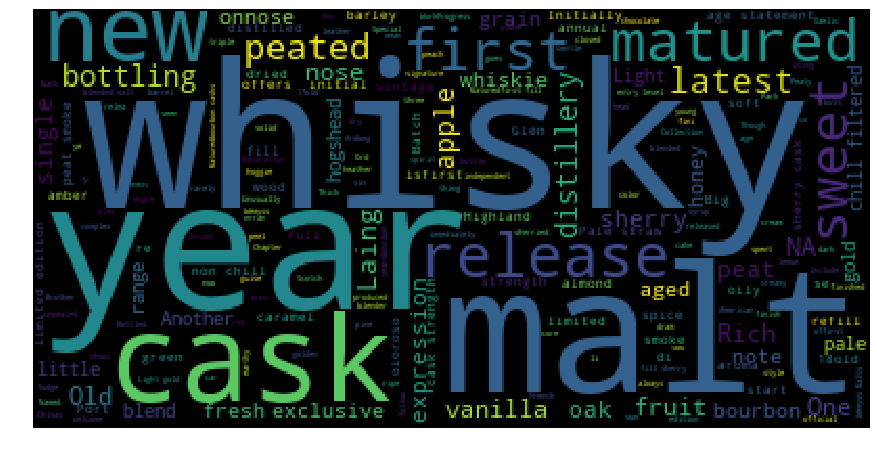

In [20]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from scipy.misc import imread
from os import path


plt.figure(figsize=(15,8))
df_under = df[df['price'] < 190]
wordcloud = WordCloud().generate(df_under['description'].to_string())
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [21]:
Counter(" ".join(df_under["description"]).split()).most_common(20)

[('sherry', 117),
 ('sweet', 114),
 ('more', 113),
 ('finish.', 101),
 ('bottles)', 97),
 ('by', 94),
 ('notes', 91),
 ('oak', 90),
 ('you', 89),
 ('fruit', 80),
 ('which', 79),
 ('Water', 77),
 ('some', 73),
 ('chocolate,', 70),
 ('fruits,', 68),
 ('peat', 67),
 ('chocolate', 65),
 ('vanilla,', 64),
 ('orange', 64),
 ('smoke', 64)]

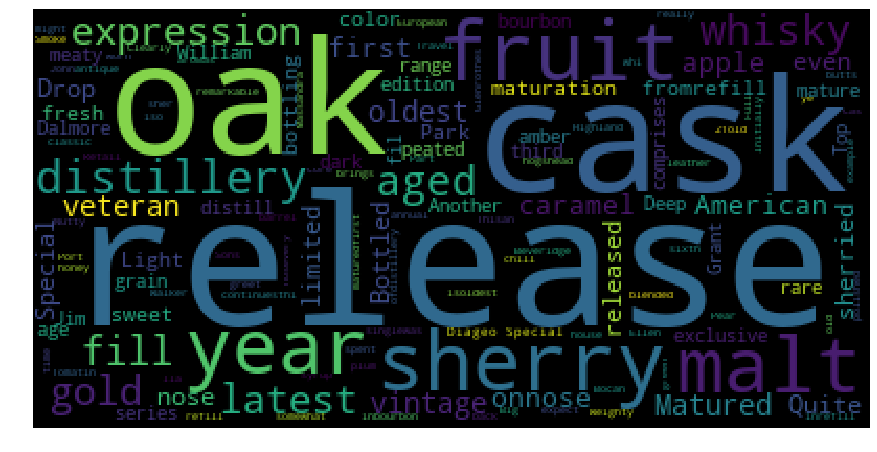

In [22]:
plt.figure(figsize=(15,8))
df_over = df[df['price'] > 190]
wordcloud = WordCloud().generate(df_over['description'].to_string())
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [23]:
Counter(" ".join(df_over["description"]).split()).most_common(20)

[('bottles)', 78),
 ('oak', 72),
 ('sherry', 50),
 ('sweet', 45),
 ('fruits,', 37),
 ('finish.', 35),
 ('more', 34),
 ('by', 34),
 ('notes', 33),
 ('fruit', 32),
 ('dried', 31),
 ('orange', 29),
 ('fruits', 27),
 ('oak.', 27),
 ('you', 26),
 ('It’s', 24),
 ('American', 24),
 ('as', 24),
 ('honey,', 23),
 ('chocolate,', 23)]

In [24]:
df.price.dtype

dtype('float64')

In [25]:
df['premium'] = np.where(df['price'] >= 190, 1, 0)

In [26]:
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.externals import joblib

# Features and Labels
X = df['description']
y = df['premium']

# Extract Feature With CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(X) # Fit the Data


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.7472826086956522

In [27]:
pickle.dump(cv, open('tranform.pkl', 'wb'))
filename = 'scotch_predict_nlp_model.pkl'
pickle.dump(clf, open(filename, 'wb'))